In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Stellar Classification Dataset - SDSS17
# dataset url: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download
dataset_relative_path = "star_classification.csv"
df = pd.read_csv(dataset_relative_path)

In [3]:
print("Size: ", df.shape)
print("Columns:\n", df.columns)
print("Types:\n", df.dtypes)

Size:  (100000, 18)
Columns:
 Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')
Types:
 obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object


1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [4]:
df.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
# Значення -9999.000000 в u, g, z явно вказує на наявність значення NO DATA, оскільки ці показники не можуть приймати таке значення
df = df.drop(df[df["u"] == -9999.0].index)
df = df.drop(df[df["g"] == -9999.0].index)
df = df.drop(df[df["z"] == -9999.0].index)
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,301.0,3.511625,186.127011,5.783903e+18,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,0.0,1.586913,149.007687,3.324026e+18,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,301.0,2.000000,82.000000,2.844137e+18,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,301.0,4.000000,146.000000,5.614896e+18,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,301.0,5.000000,241.000000,8.332365e+18,0.704172,7400.500000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
# obj_ID, alpha, delta, run_ID, rerun_ID, spec_obj_ID, field_ID - не можуть впливати на класифікацію
df = df.drop(columns=["obj_ID", "alpha", "delta", "run_ID", "rerun_ID", "spec_obj_ID", "field_ID"], errors='ignore')
df.head()

,u,g,r,i,z,cam_col,class,redshift,plate,MJD,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039,775
4,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187,842


In [8]:
df["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [9]:
remap_dict = {"GALAXY": 0, "QSO": 1, "STAR": 2}
df["class"].update(df["class"].map(remap_dict))
df = df.astype({"class": "int64"})
df.head()

,u,g,r,i,z,cam_col,class,redshift,plate,MJD,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,2,0,0.634794,5812,56354,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,5,0,0.779136,10445,58158,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,2,0,0.644195,4576,55592,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,3,0,0.932346,9149,58039,775
4,19.43718,17.58028,16.49747,15.97711,15.54461,3,0,0.116123,6121,56187,842


In [10]:
df.dtypes

u           float64
g           float64
r           float64
i           float64
z           float64
cam_col       int64
class         int64
redshift    float64
plate         int64
MJD           int64
fiber_ID      int64
dtype: object

<Axes: >

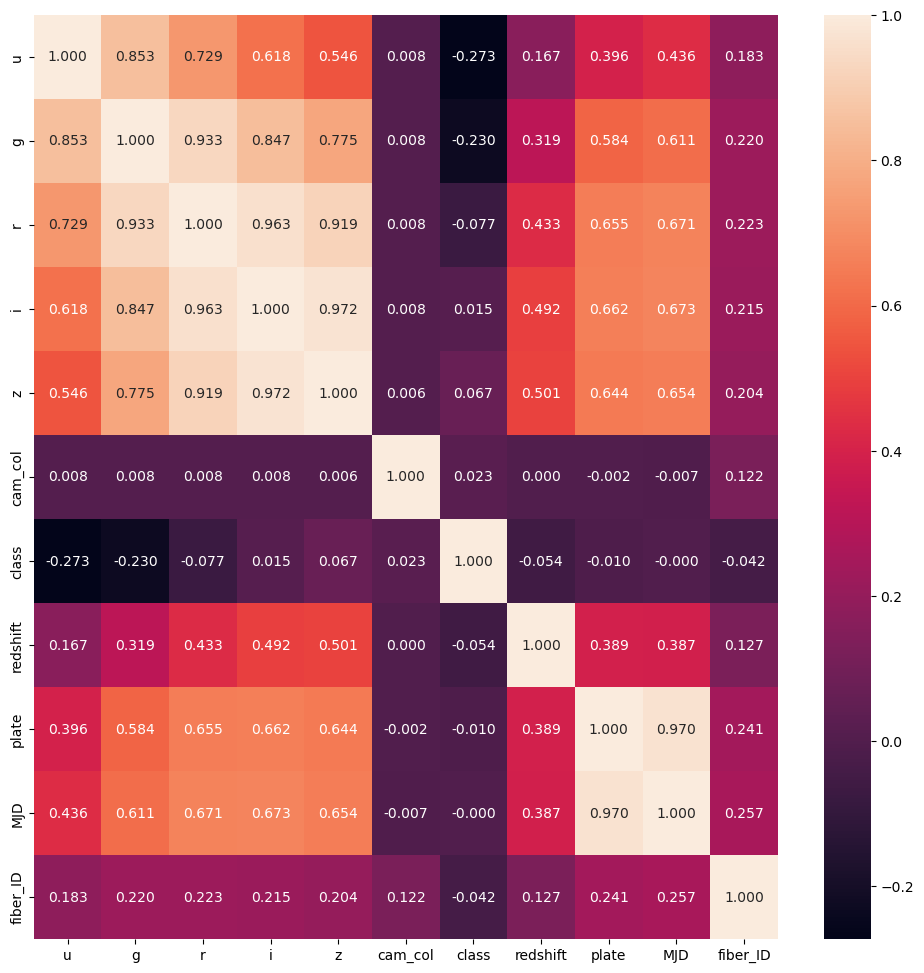

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt=".3f")

array([[<Axes: title={'center': 'u'}>, <Axes: title={'center': 'g'}>,
        <Axes: title={'center': 'r'}>],
       [<Axes: title={'center': 'i'}>, <Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'cam_col'}>],
       [<Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>],
       [<Axes: title={'center': 'MJD'}>,
        <Axes: title={'center': 'fiber_ID'}>, <Axes: >]], dtype=object)

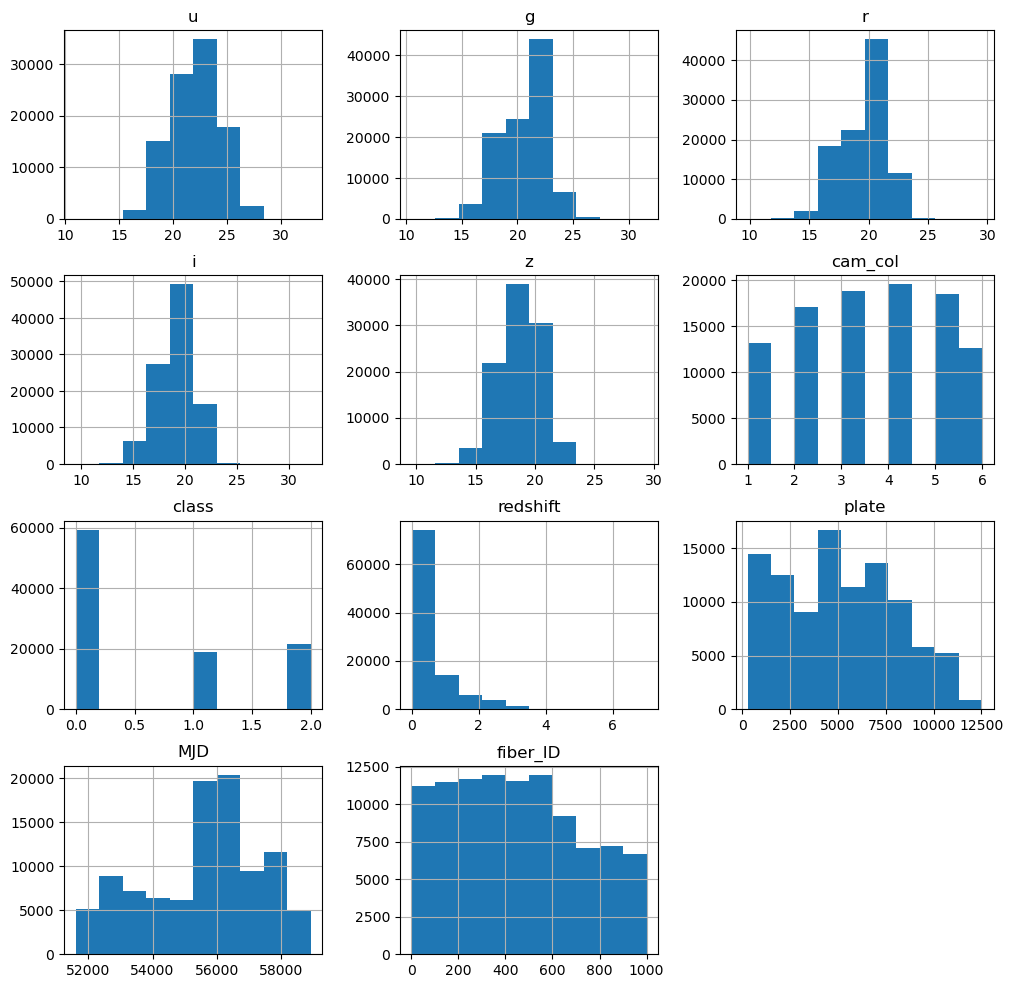

In [12]:
df.hist(figsize=(12, 12))

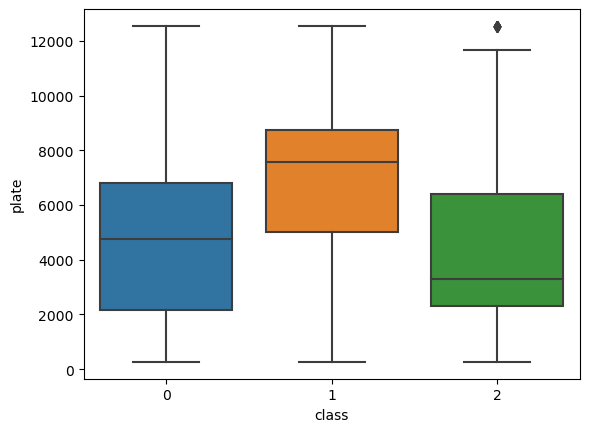

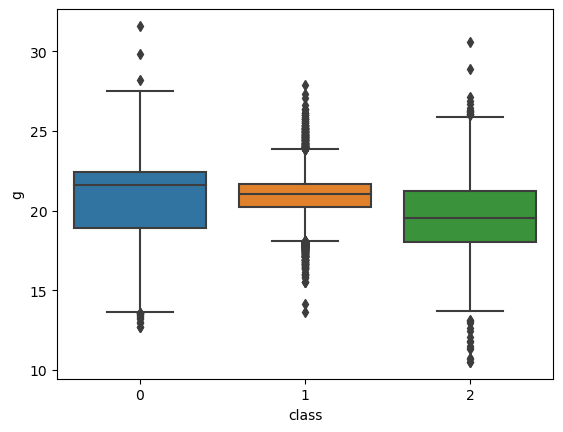

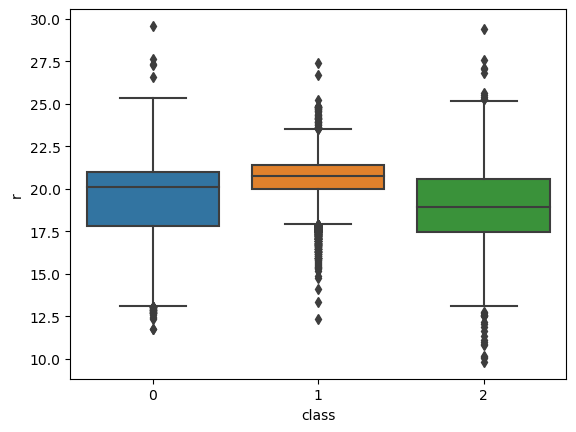

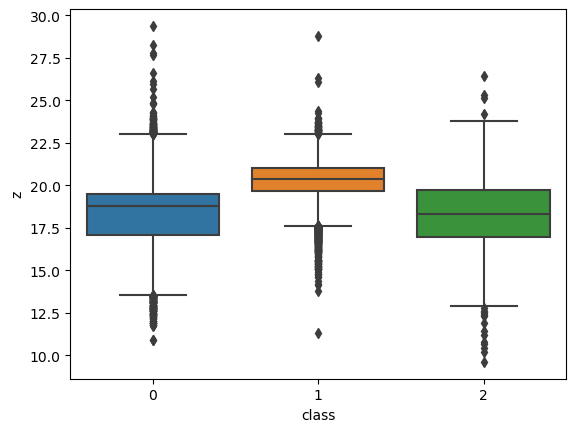

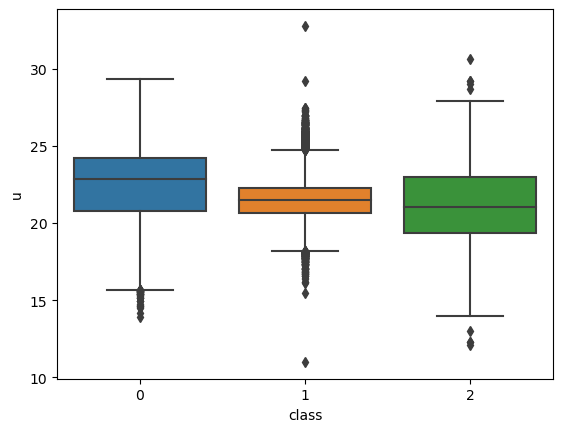

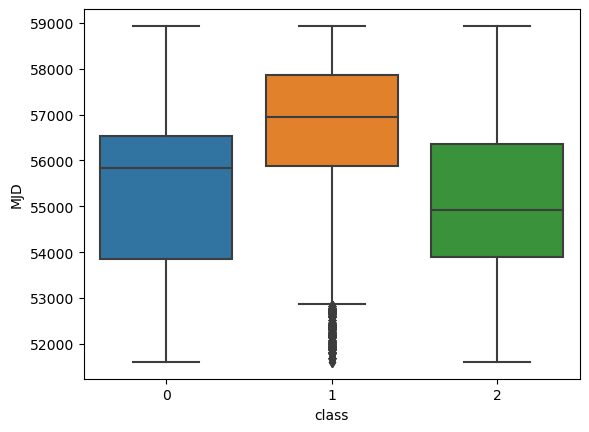

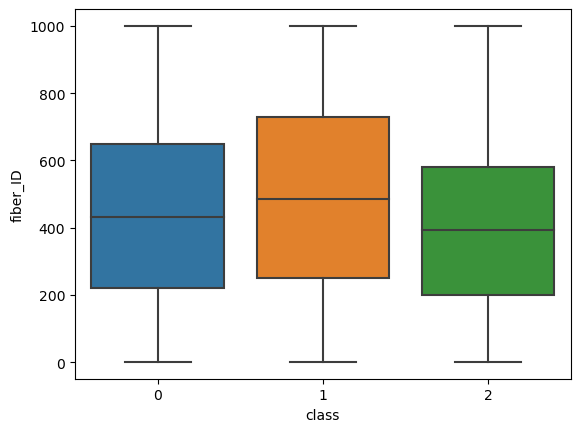

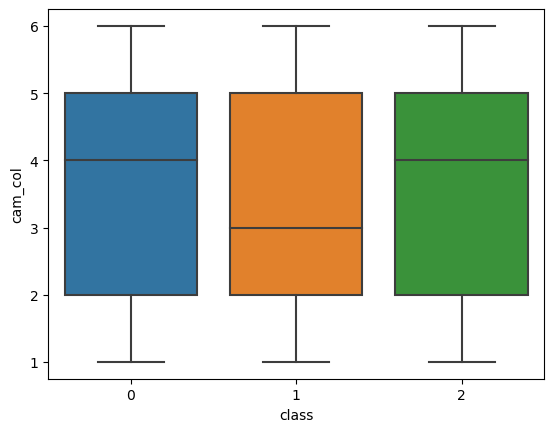

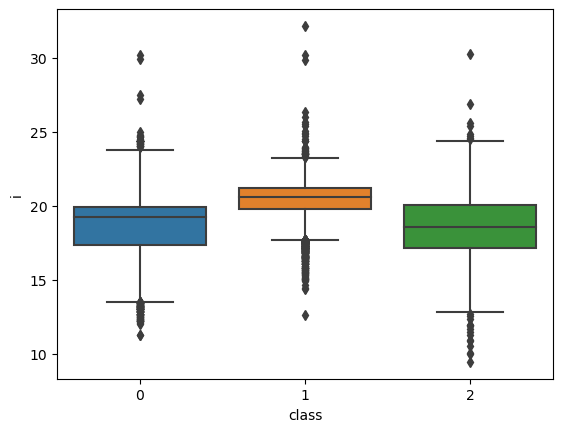

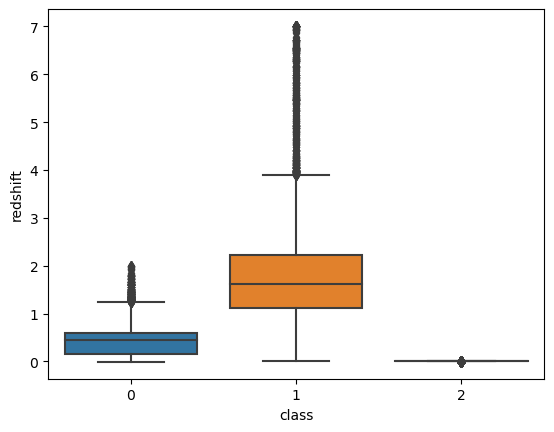

In [13]:
features = list(set(df.columns))
features.remove("class")
for i in range(len(features)):
    figure = plt.figure()
    ax = sns.boxplot(x='class', y=features[i], data=df)

array([[<Axes: xlabel='u', ylabel='u'>, <Axes: xlabel='g', ylabel='u'>,
        <Axes: xlabel='r', ylabel='u'>, <Axes: xlabel='i', ylabel='u'>,
        <Axes: xlabel='z', ylabel='u'>,
        <Axes: xlabel='cam_col', ylabel='u'>,
        <Axes: xlabel='class', ylabel='u'>,
        <Axes: xlabel='redshift', ylabel='u'>,
        <Axes: xlabel='plate', ylabel='u'>,
        <Axes: xlabel='MJD', ylabel='u'>,
        <Axes: xlabel='fiber_ID', ylabel='u'>],
       [<Axes: xlabel='u', ylabel='g'>, <Axes: xlabel='g', ylabel='g'>,
        <Axes: xlabel='r', ylabel='g'>, <Axes: xlabel='i', ylabel='g'>,
        <Axes: xlabel='z', ylabel='g'>,
        <Axes: xlabel='cam_col', ylabel='g'>,
        <Axes: xlabel='class', ylabel='g'>,
        <Axes: xlabel='redshift', ylabel='g'>,
        <Axes: xlabel='plate', ylabel='g'>,
        <Axes: xlabel='MJD', ylabel='g'>,
        <Axes: xlabel='fiber_ID', ylabel='g'>],
       [<Axes: xlabel='u', ylabel='r'>, <Axes: xlabel='g', ylabel='r'>,
        <Axes: xla

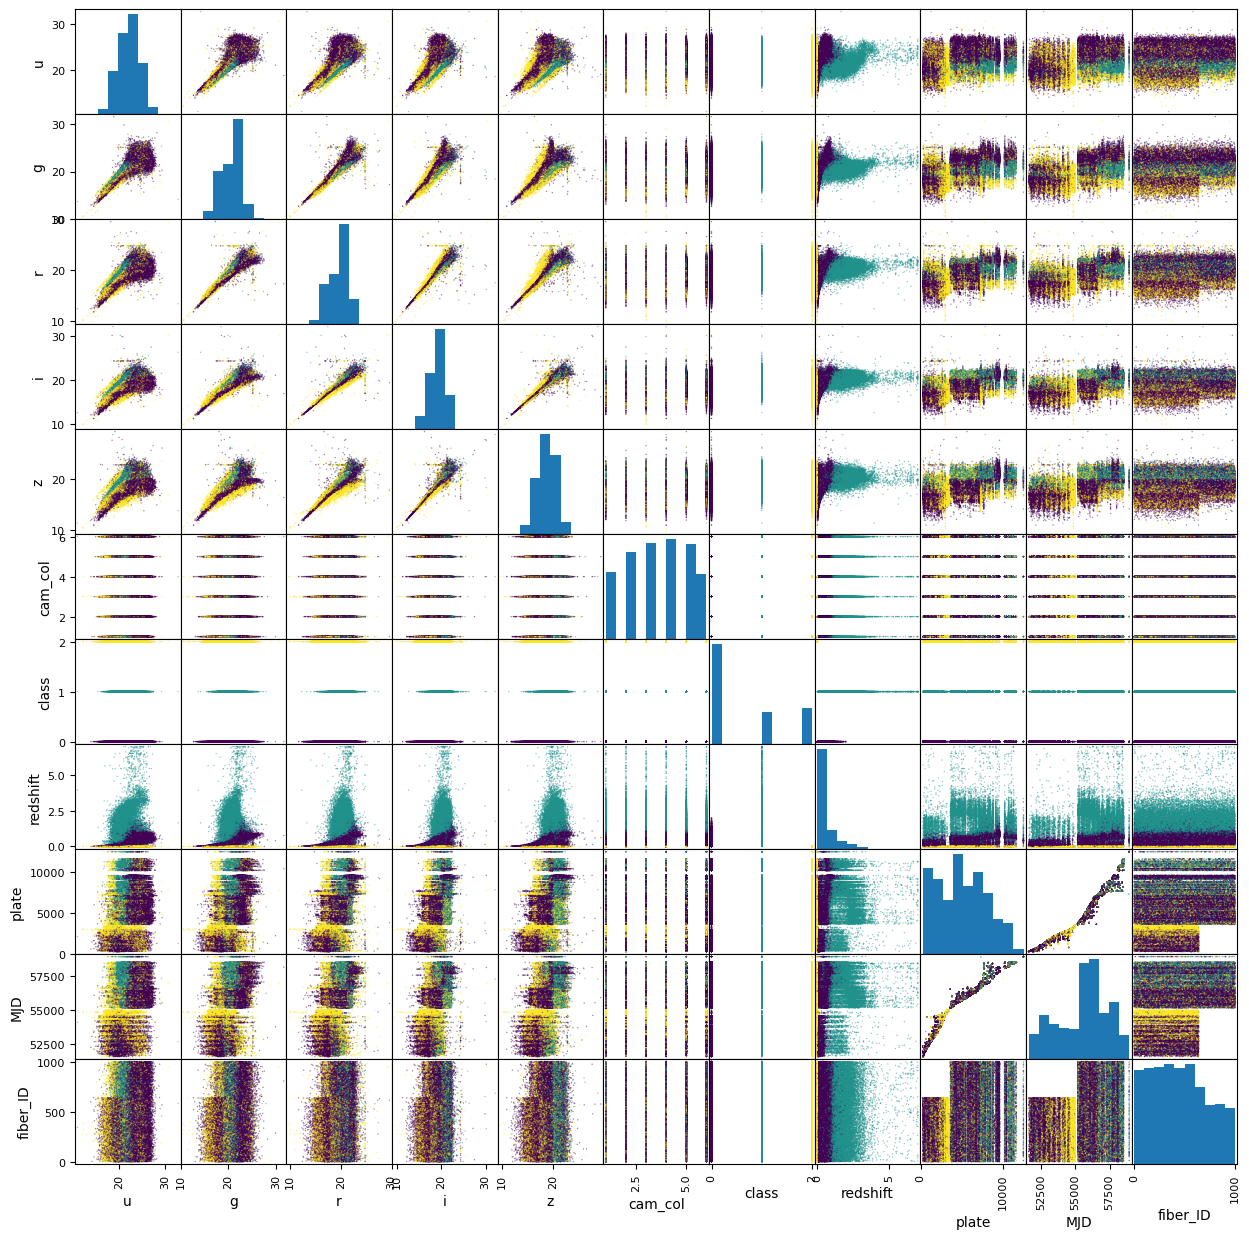

In [15]:
pd.plotting.scatter_matrix(df, c=df["class"], figsize=(15, 15), marker='o', s=1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df["class"]
X = df.drop(["class"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score


Best k =  3
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     17807
           1       0.96      0.88      0.92      5731
           2       0.85      0.78      0.81      6462

    accuracy                           0.90     30000
   macro avg       0.90      0.87      0.88     30000
weighted avg       0.90      0.90      0.89     30000

[[16828   211   768]
 [  612  5030    89]
 [ 1433     9  5020]]


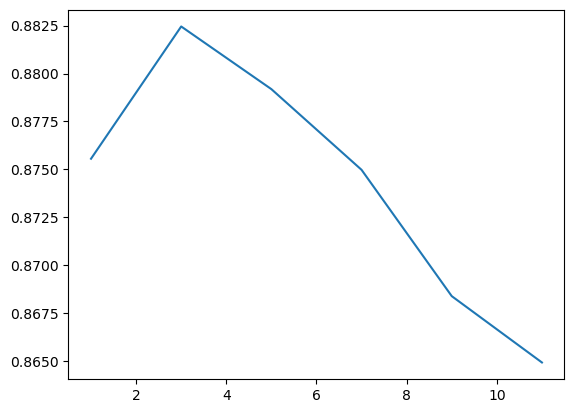

In [25]:
from sklearn.neighbors import KNeighborsClassifier

k_arr = [1, 3, 5, 7, 9, 11]
result_fscore = [None]*len(k_arr)
results_other = [None]*len(k_arr)
models = [None]*len(k_arr)
for i in range(len(k_arr)):
    k = k_arr[i]
    clf = KNeighborsClassifier(n_neighbors=k, p=3.14)
    clf.fit(X_train, y_train)

    prediction = clf.predict(X_test)
    result_fscore[i] = f1_score(y_test, prediction, average="macro")
    results_other[i] = {}
    results_other[i]["report"] = classification_report(y_test, prediction)
    results_other[i]["matrix"] = confusion_matrix(y_test, prediction)

    models[i] = clf

plt.plot(k_arr, result_fscore)

best_i = np.argmax(result_fscore)
print("Best k = ", k_arr[best_i])
print(results_other[best_i]["report"])
print(results_other[best_i]["matrix"])

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1000)
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17807
           1       0.93      0.88      0.91      5731
           2       0.98      1.00      0.99      6462

    accuracy                           0.96     30000
   macro avg       0.96      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000

[[17298   357   152]
 [  699  5032     0]
 [    0     0  6462]]


Best n =  203
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17807
           1       0.94      0.84      0.89      5731
           2       0.98      1.00      0.99      6462

    accuracy                           0.95     30000
   macro avg       0.96      0.94      0.95     30000
weighted avg       0.95      0.95      0.95     30000

[[17350   305   152]
 [  899  4832     0]
 [    0     0  6462]]


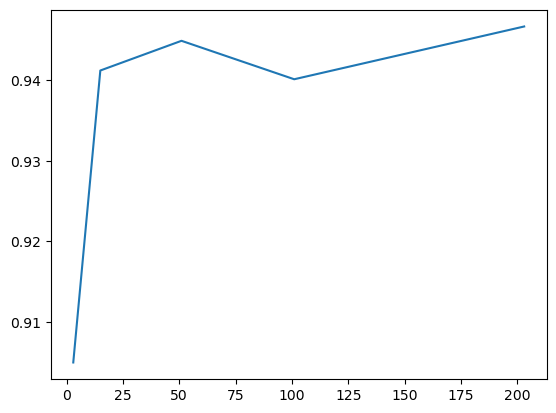

In [35]:
from sklearn.ensemble import RandomForestClassifier

n_arr = [3, 15, 51, 101, 203]
result_fscore = [None]*len(n_arr)
results_other = [None]*len(n_arr)
models = [None]*len(n_arr)
for i in range(len(n_arr)):
    n = n_arr[i]
    clf = RandomForestClassifier(n_estimators=n, max_depth=4, min_samples_leaf=1000)
    clf.fit(X_train, y_train)

    prediction = clf.predict(X_test)
    result_fscore[i] = f1_score(y_test, prediction, average="macro")
    results_other[i] = {}
    results_other[i]["report"] = classification_report(y_test, prediction)
    results_other[i]["matrix"] = confusion_matrix(y_test, prediction)

    models[i] = clf

plt.plot(n_arr, result_fscore)

best_i = np.argmax(result_fscore)
print("Best n = ", n_arr[best_i])
print(results_other[best_i]["report"])
print(results_other[best_i]["matrix"])

In [44]:
from sklearn.ensemble import AdaBoostClassifier

base_clf = DecisionTreeClassifier(max_depth=2) # При дефолтному естіматорі все взагалі сумно-сумно
clf = AdaBoostClassifier(estimator=base_clf, n_estimators=40, learning_rate=10)
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     17807
           1       0.94      0.80      0.87      5731
           2       0.98      0.97      0.98      6462

    accuracy                           0.94     30000
   macro avg       0.95      0.92      0.93     30000
weighted avg       0.94      0.94      0.94     30000

[[17398   271   138]
 [ 1150  4581     0]
 [  176     0  6286]]


In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

y = df["class"]
X = df.drop(["class"], axis=1)

# при оригінальних розмірах навчання займає вічність, тому зменшимо розмір вибірки в 10 разів
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=7000, test_size=3000)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svc = SVC(kernel="rbf")
parameters = {"C": [1, 10, 100, 1000], "gamma": [0.01, 0.1, 1, 10]}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

{'C': 1000, 'gamma': 0.1}
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1760
           1       0.97      0.90      0.93       594
           2       0.94      1.00      0.97       646

    accuracy                           0.96      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.96      0.96      0.96      3000

[[1704   14   42]
 [  62  532    0]
 [   1    0  645]]
